# Assignment 02: Cluster Analysis
# Team 1: Mateusz Czarnecki, Jani Peltonen, Amal Kayed

## Exercise 1.

### Importing the required libraries


In [1]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
import seaborn as sn # a library for making statistical graphics
import matplotlib.pyplot as plt # a cross-platform, data visualization and graphical plotting library

from sklearn.cluster import KMeans

from sklearn.cluster import AgglomerativeClustering

### Creating the dataframe out of the .csv file.

In [2]:
df = pd.read_csv("drone_delivery_v1.csv", sep=';')
df = df.drop(['clientid'], axis=1)
df

,x,y
0,622.771572,164.857623
1,416.357298,630.193634
2,292.735020,567.333231
3,737.211288,166.225676
4,540.475375,682.912298
...,...,...
5951,832.857394,616.861410
5952,242.734500,490.325092
5953,108.690847,758.833921
5954,803.251074,430.740623


### Visualizing the client locations in two-dimesional scatterplot.

<AxesSubplot:xlabel='x', ylabel='y'>

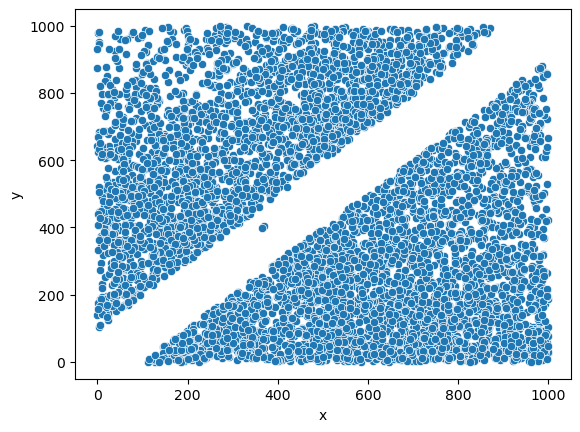

In [3]:
sn.scatterplot(x="x", y="y",  data=df, palette='viridis')

### Creating the clusters using the kmeans algorithm

In [4]:
kmeans_model = KMeans(n_clusters=3)
clusters = kmeans_model.fit_predict(df[['x','y']])

clusters

array([0, 1, 2, ..., 2, 0, 0], dtype=int32)

### Finding the centroids - three drone depots

In [5]:
centers = kmeans_model.cluster_centers_
centers_df = pd.DataFrame(centers, columns=[["x","y"]])
centers_df

,x,y
0,697.066505,210.133147
1,553.513677,787.360693
2,193.668553,392.867483


Here is their visualization on a graph

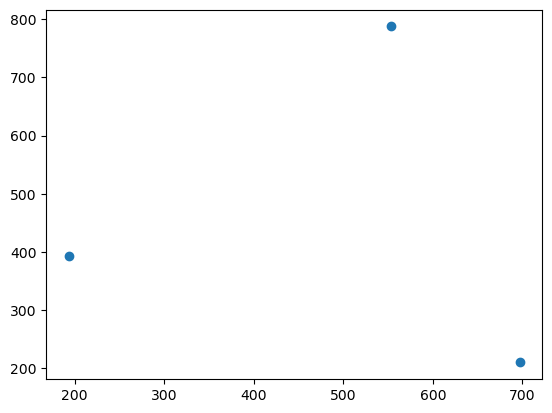

In [6]:
plt.scatter(centers_df["x"], centers_df["y"])

## Exercise 2

### Dataframe presenting the closest depot to each client

In [7]:
df_with_clusters = df.copy()
df_with_clusters['Clusters'] = kmeans_model.labels_
df_with_clusters.head(10)

,x,y,Clusters
0,622.771572,164.857623,0
1,416.357298,630.193634,1
2,292.735020,567.333231,2
3,737.211288,166.225676,0
4,540.475375,682.912298,1
5,535.469492,318.439661,0
6,640.380050,870.833221,1
7,235.772075,359.048203,2
8,481.896884,661.491838,1
9,730.032789,312.177817,0


## Exercise 3

### Scatterplot showing people served by their depots

[Text(0.5, 1.0, 'Clusters')]

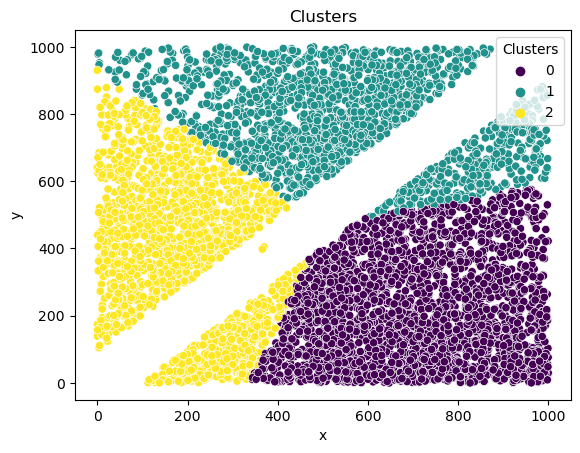

In [8]:
sn.scatterplot(x="x", y="y",hue = 'Clusters',  data=df_with_clusters, palette='viridis').set(title="Clusters")

## Exercise 4

### Finding the optimal locations for more depots

When playing with a small number of clusters (like 1 or 10), I didn't see any change of the computation time. However, when setting a bigger number of clusters (above 200), I can see much bigger change in the computation time.

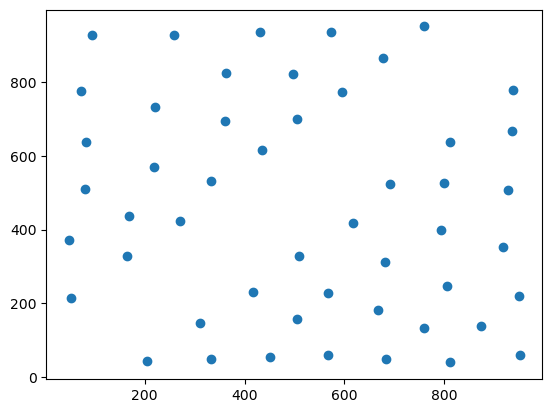

In [9]:
kmeans_model = KMeans(n_clusters=50)
clusters = kmeans_model.fit_predict(df[['x','y']])

centers = kmeans_model.cluster_centers_
centers_df = pd.DataFrame(centers, columns=[["x","y"]])

plt.scatter(centers_df["x"], centers_df["y"])

## Exercise 5

### Creating clusters using agglomerative hierarchical clustering

The main observation is that the agglomerative hierarchical clustering algorithm works faster when crearing a big number of clusters. It also creates different classes than kmeans algorithm, which can be seen when comparing both algorithms to create the same number of clusters.

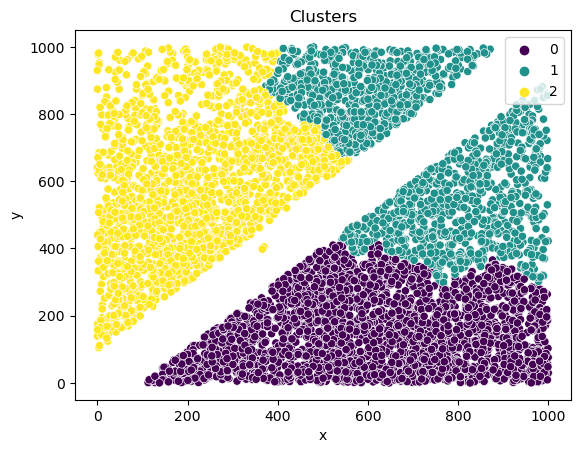

In [10]:
clustering_model = AgglomerativeClustering(n_clusters=3, linkage="ward")
clustering_model.fit(df)
sn.scatterplot(data=df, x='x', y='y', hue=clustering_model.labels_, palette='viridis').set_title('Clusters');